In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, KFold
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# First Analysis

In [102]:
HRisk_data = pd.read_csv("Maternal Health Risk Data Set.csv")
HRisk_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


#### The target column is RiskLevel with three classes named: 'high risk', 'low risk', 'mid risk'

In [103]:
HRisk_data["RiskLevel"].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

# Data pre-processing

### Removing NaN values

In [104]:
HRisk_data = HRisk_data.dropna()
HRisk_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


#### Converting mid risk and high risk to 1 and low risk to 0

In [105]:
HRisk_data["RiskLevel"] = HRisk_data["RiskLevel"].replace({"low risk": 0, "mid risk": 1, "high risk": 1})
HRisk_data["RiskLevel"].unique()

array([1, 0], dtype=int64)

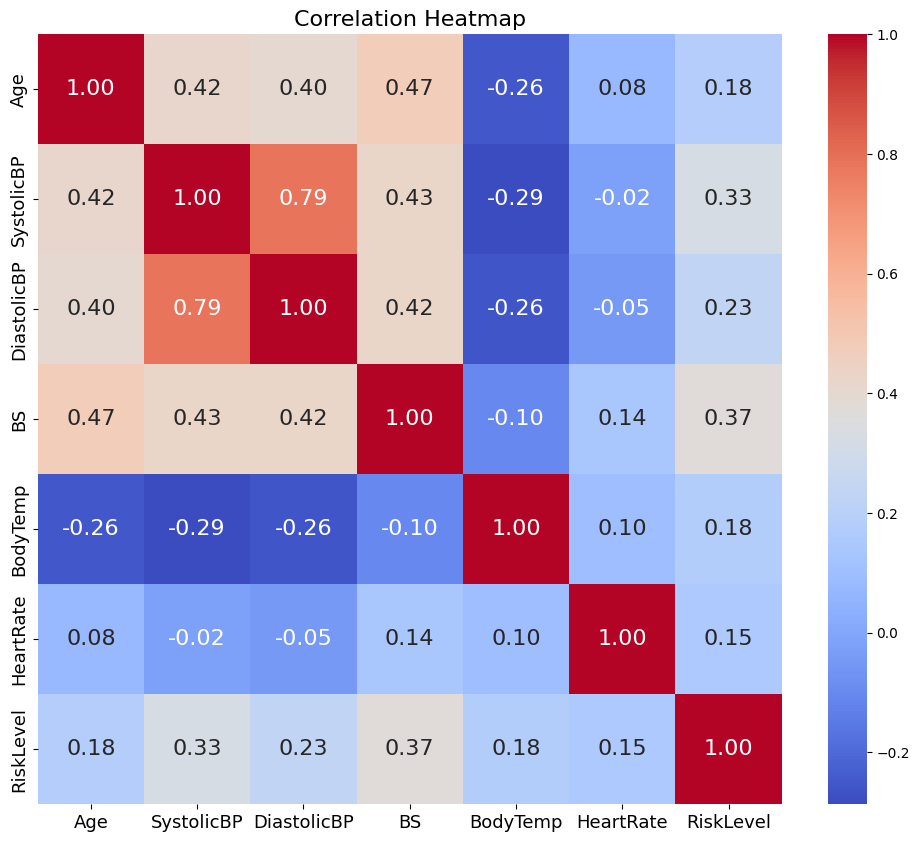

In [106]:
# plt.figure(figsize=(12, 10))
# sns.heatmap(HRisk_data.corr(), annot=True, cmap='coolwarm', fmt=".2f",
#                       annot_kws={"fontsize": 7})  # Adjust fontsize as needed
# plt.title("correlation heatmap")
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(HRisk_data.corr(), annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"fontsize": 16})  # Adjust fontsize as needed
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=13)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=13)
plt.title("Correlation Heatmap", fontsize=16)  # Adjust fontsize as needed
plt.show()

Text(0.5, 1.0, 'Counts of each target names')

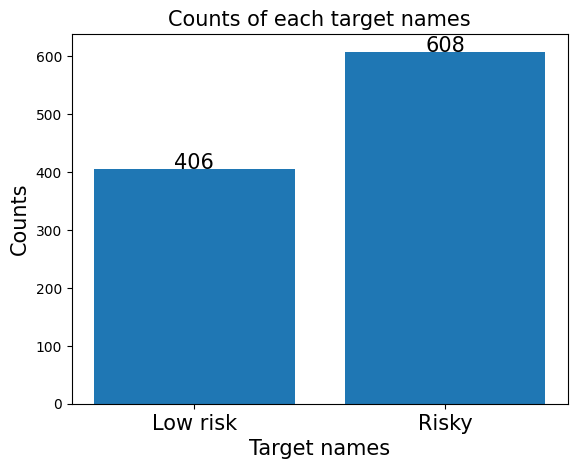

In [107]:
lowRisk_count = HRisk_data[HRisk_data["RiskLevel"] == 0].RiskLevel.count()
Risky_count = HRisk_data[HRisk_data["RiskLevel"] == 1].RiskLevel.count()

plt.bar(['Low risk', 'Risky'], [lowRisk_count, Risky_count])
plt.xticks(fontsize=15)

for i, count in enumerate([lowRisk_count, Risky_count]):
    plt.text(i, count + 0.1, str(count), ha='center', fontsize=15)

plt.xlabel("Target names", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.title("Counts of each target names", fontsize=15)

In [108]:
data = HRisk_data[["SystolicBP", "DiastolicBP", "BS", "RiskLevel", "BodyTemp"]]
data

,SystolicBP,DiastolicBP,BS,RiskLevel,BodyTemp
0,130,80,15.0,1,98.0
1,140,90,13.0,1,98.0
2,90,70,8.0,1,100.0
3,140,85,7.0,1,98.0
4,120,60,6.1,0,98.0
...,...,...,...,...,...
1009,120,60,15.0,1,98.0
1010,120,90,18.0,1,98.0
1011,85,60,19.0,1,98.0
1012,120,90,18.0,1,98.0


In [109]:
X = HRisk_data.drop(["RiskLevel", "HeartRate"], axis=1).values.copy()
y = HRisk_data["RiskLevel"].values.copy()


### Defining the decision boundaries

In [110]:
y_data = y
X_data_Sys_Dia = HRisk_data[["SystolicBP", "DiastolicBP"]]
X_data_Sys_BS = HRisk_data[["SystolicBP", "BS"]]

c:\Users\Sadra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


'b0 -> -6.860723736639267'

'b1 -> 0.029021829241884827'

'b2 -> 0.5138153397219627'

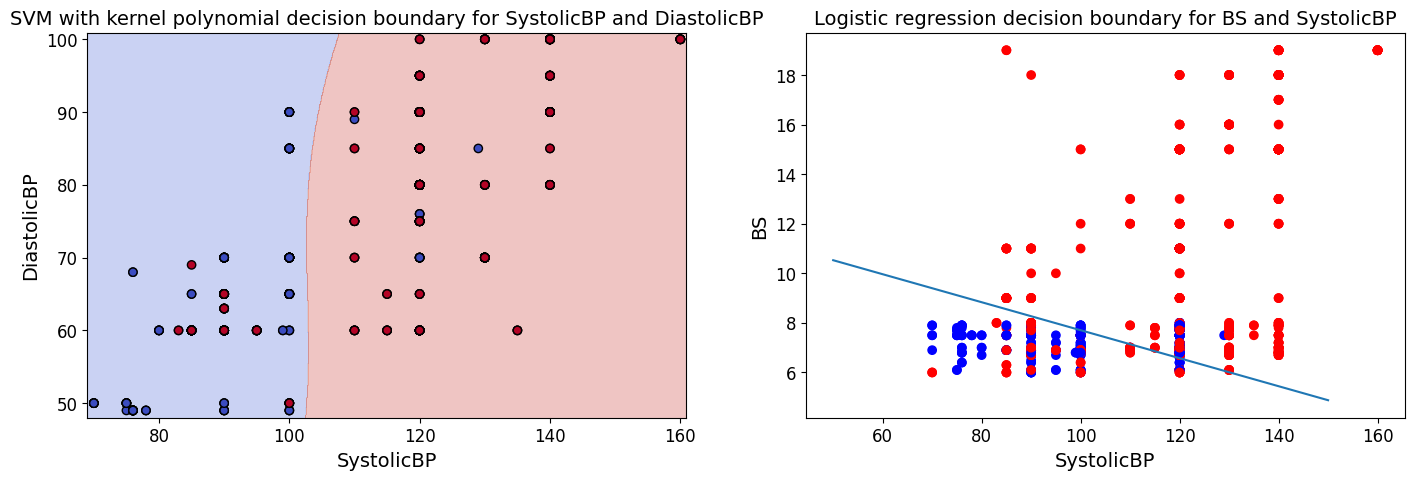

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

fig, axs = plt.subplots(1, 2, figsize=(17, 5))




clf = SVC(kernel='poly', class_weight={0: 1, 1: 1})
clf.fit(X_data_Sys_Dia, y_data)
x_min, x_max = X_data_Sys_Dia.iloc[:, 0].min() - 1, X_data_Sys_Dia.iloc[:, 0].max() + 1
y_min, y_max = X_data_Sys_Dia.iloc[:, 1].min() - 1, X_data_Sys_Dia.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
# Plot class samples
axs[0].scatter(X_data_Sys_Dia.iloc[:, 0], X_data_Sys_Dia.iloc[:, 1], c=y_data, cmap='coolwarm', edgecolors='k')
plt.xticks(fontsize=14)
axs[0].set_xlabel('SystolicBP', fontsize = 14)
axs[0].set_ylabel('DiastolicBP', fontsize = 14)
axs[0].set_title("SVM with kernel polynomial decision boundary for SystolicBP and DiastolicBP", fontsize = 14)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)



color = ['b' if y == 0 else "r" for y in HRisk_data["RiskLevel"]]
lm = LogisticRegression()
lm.fit(HRisk_data[["SystolicBP", "BS"]], HRisk_data["RiskLevel"])
axs[1].scatter(HRisk_data["SystolicBP"], HRisk_data["BS"], c=color)
b0 = lm.intercept_[0]
b = lm.coef_[0]
x_ = [50, 150]
y_ = [-(b0 + b[0] * x)/b[1] for x in x_]
axs[1].plot(x_, y_)
axs[1].set_xlabel("SystolicBP", fontsize = 14)
axs[1].set_ylabel("BS", fontsize = 14)
axs[1].set_title("Logistic regression decision boundary for BS and SystolicBP", fontsize = 14)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
display(f"b0 -> {b0}")
display(f"b1 -> {b[0]}")
display(f"b2 -> {b[1]}")
# display(f"b -> {b}")



In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [113]:
LRmodel = LogisticRegression(max_iter=1000)
LRmodel.fit(X_train, y_train)
y_pred_LR = LRmodel.predict(X_test)



In [114]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_LR, labels=[0, 1])

display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.63265306 0.82857143]'

'recall = [0.775      0.70731707]'

'f-score = [0.69662921 0.76315789]'

# SVM linear

In [115]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred_LSVM = model.predict(X_test)



In [116]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_LSVM, labels=[0, 1])

display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.61111111 0.85263158]'

'recall = [0.825      0.65853659]'

'f-score = [0.70212766 0.74311927]'

# SVM linear changing the class weights

In [117]:
model = SVC(kernel="linear", class_weight={0: .9, 1: 1})
model.fit(X_train, y_train)
y_pred_LSVM_ClassWeights = model.predict(X_test)


In [118]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_LSVM_ClassWeights, labels=[0, 1])

display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.68831169 0.78571429]'

'recall = [0.6625     0.80487805]'

'f-score = [0.67515924 0.79518072]'

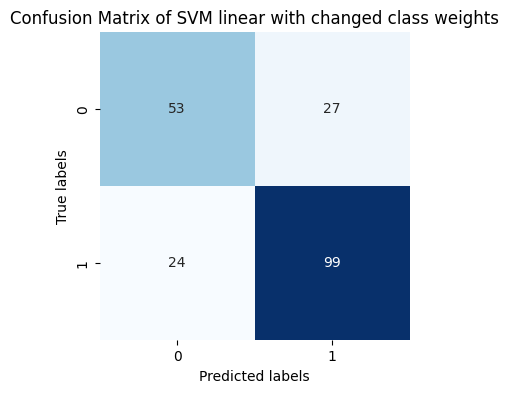

In [132]:
cm = confusion_matrix(y_test, y_pred_LSVM_ClassWeights)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of SVM linear with changed class weights')
plt.show()

# SVM polynomial

In [119]:
model = SVC(kernel="poly")
model.fit(X_train, y_train)
y_pred_SVM_poly = model.predict(X_test)



In [120]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_SVM_poly, labels=[0, 1])
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.60576923 0.82828283]'

'recall = [0.7875     0.66666667]'

'f-score = [0.68478261 0.73873874]'

# SVM polynomial changing class weight

In [121]:
model = SVC(kernel="poly", class_weight={0: .9, 1: 1})
model.fit(X_train, y_train)
y_pred_poly_classWeights = model.predict(X_test)


In [122]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_poly_classWeights, labels=[0, 1])

display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.65853659 0.78512397]'

'recall = [0.675      0.77235772]'

'f-score = [0.66666667 0.77868852]'

# SVM RBF


In [124]:
model = SVC(kernel="rbf")
model.fit(X_train, y_train)
y_pred_RBF = model.predict(X_test)


In [125]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_RBF, labels=[0, 1])

display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.63235294 0.72592593]'

'recall = [0.5375     0.79674797]'

'f-score = [0.58108108 0.75968992]'

# SVM RBF with changing class weights

In [126]:
model = SVC(kernel="rbf", class_weight={0: .9, 1: 1})
model.fit(X_train, y_train)
y_pred_RBF_ClassWeights = model.predict(X_test)


In [127]:
p,r,f,s = precision_recall_fscore_support(y_test, y_pred_RBF_ClassWeights, labels=[0, 1])

display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'precision = [0.72       0.65168539]'

'recall = [0.225      0.94308943]'

'f-score = [0.34285714 0.77076412]'

# Second analysis